In [172]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [183]:
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)

In [184]:
class CatDog(Dataset):
    def __init__(self, paths, y):
        self.transformer = transforms.Compose([
            transforms.Resize(256, interpolation=transforms.InterpolationMode.BILINEAR),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        self.x = paths
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        x = self.transformer(self.x[idx])

        return x, self.y[idx]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


tensor(0.0067)

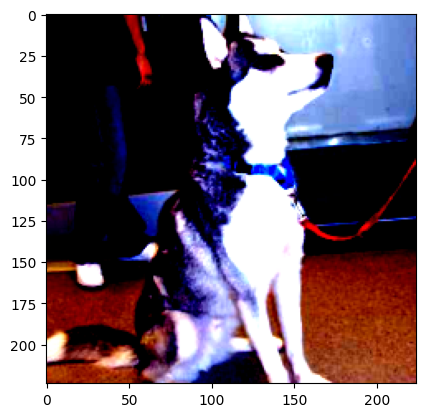

In [185]:
cat_img = Image.open('./catBad.jpg')
dog_img = Image.open('./dogBad.jpg')

sample_x = [cat_img, dog_img]
sample_y = torch.tensor([[1], [0]], dtype=torch.float32)

dataset = CatDog(sample_x, sample_y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

plt.imshow(dataset[1][0].permute(1,2,0))
dataset[1][0].mean()

In [186]:
for p in vgg16.parameters():
    p.requires_grad = False

In [187]:
vgg16.avgpool = nn.AdaptiveAvgPool2d(1)
vgg16.classifier = nn.Sequential(
    nn.Linear(512, 1),
    nn.Sigmoid(),
)

In [193]:
opt = optim.Adam(vgg16.parameters())
criterion = nn.BCELoss()

for x, y in dataloader:
    _y = vgg16(x)
    print(_y.shape)
    loss = criterion(_y, y)

    opt.zero_grad()
    loss.backward()
    for name, p in vgg16.named_parameters():
        if p.requires_grad: print(f"{name}, {p.grad}")
    opt.step()

torch.Size([2, 1])
classifier.0.weight, tensor([[-5.5460e-02, -8.1374e-03, -2.1283e-02,  3.3539e-01, -5.4170e-02,
          2.2580e-01, -2.4519e-03, -7.3795e-02, -1.0229e-02, -3.5560e-02,
          2.5854e-02,  2.3759e-02,  3.1235e-02,  8.7980e-03,  2.0395e-02,
         -2.0221e-02, -8.2489e-02, -1.1433e-02,  1.9726e-02,  2.7571e-01,
         -9.1052e-02,  1.1905e-03, -2.0624e-01, -9.1729e-02,  3.9686e-02,
         -1.1072e-02,  3.8512e-02,  6.9089e-02,  8.7365e-02,  7.8458e-02,
          7.1856e-02, -1.2742e-02,  9.5365e-02, -1.8187e-01, -3.3700e-02,
          3.8092e-02,  1.6804e-01, -4.8948e-02,  2.2611e-02, -1.9374e-02,
          9.4678e-03, -4.1931e-02,  7.1681e-02,  5.9338e-02, -1.3307e-01,
          7.1518e-03,  2.0229e-02,  2.8423e-02, -1.0477e-01,  6.5135e-03,
          9.2654e-02,  1.6593e-01, -6.4844e-02,  9.4425e-02, -9.1433e-02,
          2.1795e-01, -7.6381e-03, -5.8579e-02,  1.8679e-02,  5.5574e-02,
         -1.2723e-02,  8.2785e-02,  1.2886e-02, -1.7412e-01,  1.8537e-02